# Reboot - SQL Advanced

Tonight, we will use the Blog SQLite database:

In [1]:
!tree

.
├── README.md
├── data
│   └── blog.sqlite
└── recap.ipynb

1 directory, 3 files


## 1. Schema ERD

❓ Open the `data/blog.sqlite` in DBeaver, explore the schema and draw it on [kitt.lewagon.com/db](https://kitt.lewagon.com/db).

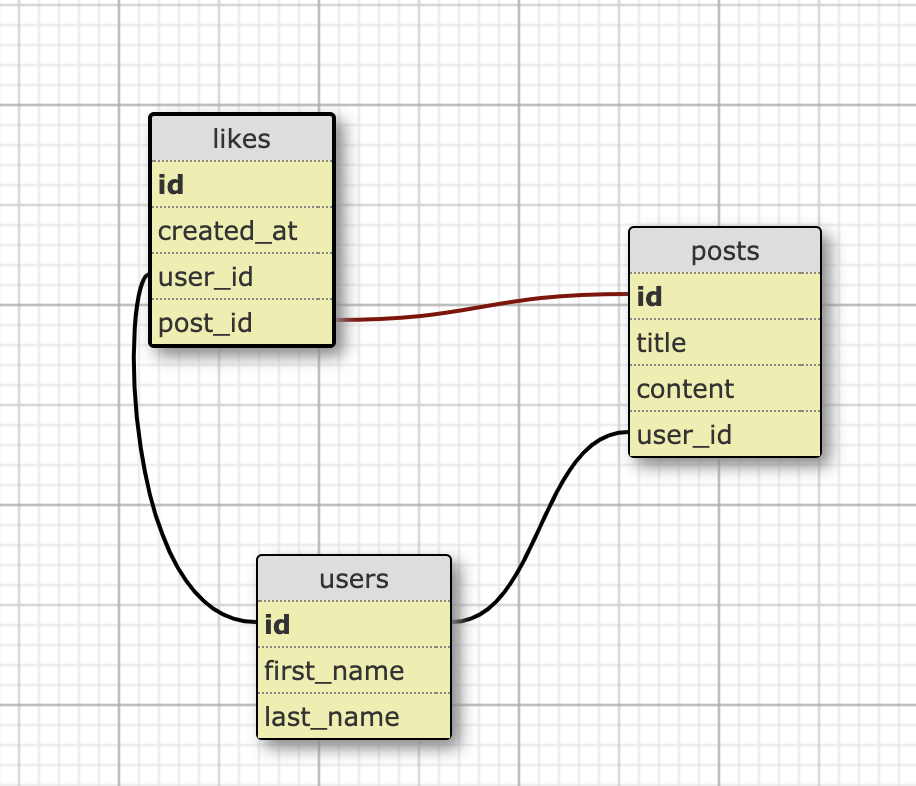

Compute the cumulative number of likes per day

---
## 2. Most liked posts

Complete the code to get **the 3 most liked posts**:

In [2]:
import sqlite3

conn = sqlite3.connect("data/blog.sqlite")
c = conn.cursor()

# TODO: write the query
query = """
    SELECT p.title, COUNT(l.id) like_count
    FROM posts p 
    JOIN likes l ON l.post_id = p.id 
    GROUP BY p.id 
    ORDER BY like_count DESC
    LIMIT 3
"""
# TODO: Execute the query
c.execute(query)
# TODO: Fetch and print the results
rows = c.fetchall()
rows

[('Half imagine another.', 84),
 ('Side foot leader popular.', 82),
 ('Area paper whatever mean.', 81)]

---

### Pretty Print using _pandas_

The readbility of our `print()` statements is not so good.

Next week, we will introduce [pandas](https://pandas.pydata.org/) which will vastly improve the UX of our data exploration in Notebooks.

Execute the following cell to load `pandas` library:

In [3]:
import pandas as pd

Then try the previous `query` again, delegating the job of fetching results + displaying them to the `read_sql_query` function of `pandas`:

In [4]:
pd.read_sql_query(query, conn)

,title,like_count
0,Half imagine another.,84
1,Side foot leader popular.,82
2,Area paper whatever mean.,81


---
## 3. Find the three users who 'liked' the most

In [5]:
query = """
    SELECT 
        COUNT(l.id) AS like_count, 
        u.first_name || " " || u.last_name AS name 
    FROM likes l 
    JOIN users u ON u.id = l.user_id 
    GROUP BY u.id
    ORDER BY like_count DESC 
    LIMIT 3
"""
pd.read_sql_query(query, conn)

,like_count,name
0,236,Michael Allen
1,233,Donna Ramirez
2,227,Hayley Williams


---
## 4. Find the most liked author

In [6]:
query = """
    SELECT 
        u.first_name || " " || u.last_name AS name,
        COUNT(l.id) AS like_count
    FROM posts p 
    JOIN likes l ON p.id = l.post_id 
    JOIN users u ON p.user_id = u.id
    GROUP BY u.id
    ORDER BY like_count DESC
    LIMIT 1
"""
pd.read_sql_query(query, conn)

,name,like_count
0,Teresa Moore,647


---
## 5. Who are the authors of the 3 most liked posts?

In [7]:
query = """
    SELECT 
        u.first_name || " " || u.last_name AS name,
        COUNT(l.id) like_count
    FROM posts p 
    JOIN likes l ON p.id = l.post_id 
    JOIN users u ON p.user_id = u.id 
    GROUP BY p.id
    ORDER BY like_count DESC
    LIMIT 3
"""
pd.read_sql_query(query, conn)

,name,like_count
0,Melissa Henry,84
1,Cynthia Raymond,82
2,Alexander Cook,81


---
## 6. How many people liked at least one post?

In [9]:
query = """
    WITH like_per_user AS (
        SELECT 
            u.id,
            COUNT(l.id) like_count
        FROM users u 
        JOIN likes l ON u.id = l.user_id 
        GROUP BY u.id
        HAVING like_count > 1
    )
    SELECT COUNT(*)
    FROM like_per_user
"""
#     SELECT COUNT(DISTINCT l.user_id) AS like_more_than_one_post
#     FROM likes l
pd.read_sql_query(query, conn)

,COUNT(*)
0,49


---
## 7. Compute the cumulative number of likes per day

In [12]:
query = """
    WITH likes_per_day AS (
        SELECT 
            l.created_at, 
            COUNT(l.id) AS like_count
        FROM likes l 
        GROUP BY l.created_at 
    )
    SELECT 
        lpd.created_at,
        SUM(like_count) OVER (
            ORDER BY lpd.created_at
        ) AS cumulative_likes
    FROM likes_per_day lpd
"""
pd.read_sql_query(query, conn)

,created_at,cumulative_likes
0,2019-01-01,24
1,2019-01-02,58
2,2019-01-03,98
3,2019-01-04,134
4,2019-01-05,161
...,...,...
331,2019-12-24,9882
332,2019-12-25,9915
333,2019-12-26,9947
334,2019-12-27,9970


---
## 8. (Optional) Who's the biggest fan of each author?

The biggest fan of an author is defined as the user who liked the most the author's posts.
<br><br>
<details>
    <summary>💡 Click for Hint</summary>
    You might need to use <code>WITH</code>
</details>


In [ ]:
query = """

"""
pd.read_sql_query(query, conn)